# Animal Pictures Classification using CNN

## Topic

This project is about testing a CNN on the Animal-10 dataset, which contains 28K medium quality image of ten animals : squirrel, hen, horse, butterfly, dog, cat, cow, spider, sheep and elephant. The pictures have been all downloaded from google so they have different sizes. I will test a multilayered CNN to try and categorize the pictures, after having processed the images and done the essential transformations. And after the training phase I will go on to test my model of a test set it has never seen before. I'm hoping for an accuracy of about 80%, so let's get started

## Objectives

- Preprocess the data to make it machine learning ready
- Build a CNN with enough layers to identify the differences between the images
- Train and test the model and get the accuracy

## Summary

- Importing libraries
- The dataset
- Image processing
- Some visualization
- Building the classifier
- Training the model
- Testing the model
- Conclusion

### Importing Libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import PIL
from PIL import Image
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import os
from os import listdir
from torchvision.io import read_image
import torchvision.transforms as T
import numpy as np
from glob import glob
import shutil
import cv2

### The Dataset

In [2]:
squirrel = glob(r'C:\Users\imane\Downloads\archive (15)\raw-img\squirrel\*')
print(len(squirrel))

1832


In [3]:
spider = glob(r'C:\Users\imane\Downloads\archive (15)\raw-img\spider\*')
print(len(spider))

4791


In [4]:
sheep = glob(r'C:\Users\imane\Downloads\archive (15)\raw-img\sheep\*')
print(len(sheep))

1790


In [5]:
cow = glob(r'C:\Users\imane\Downloads\archive (15)\raw-img\cow\*')
print(len(cow))

1836


In [6]:
cat = glob(r'C:\Users\imane\Downloads\archive (15)\raw-img\cat\*')
print(len(cat))

1638


In [7]:
hen = glob(r'C:\Users\imane\Downloads\archive (15)\raw-img\hen\*')
print(len(hen))

3068


In [8]:
butterfly = glob(r'C:\Users\imane\Downloads\archive (15)\raw-img\butterfly\*')
print(len(butterfly))

2082


In [9]:
elephant = glob(r'C:\Users\imane\Downloads\archive (15)\raw-img\elephant\*')
print(len(elephant))

1416


In [10]:
horse = glob(r'C:\Users\imane\Downloads\archive (15)\raw-img\horse\*')
print(len(horse))

2593


In [11]:
dog = glob(r'C:\Users\imane\Downloads\archive (15)\raw-img\dog\*')
print(len(dog))

4833


So I begin by importing the picture files and counting how many files there are per each class. You should know that the numbers above ar not the original number of pictures, they are the numbers I got after transfering out some pictures to the test file (The dataset provided didn't have seperate train and test files). The exact number of the the pictures I left for testing is 30 pictures per class and I had to restart the kernel as I was working on the project that's why I have above the numbers after the transfering.

In [64]:
squirrel_t = squirrel[:1832]
squirrel_v = squirrel[1832:]
for file in squirrel_v:
    new_path = r"C:\Users\imane\Downloads\archive (15)\test-img\squirrel" 
    shutil.move(file, new_path)

In [65]:
spider_t = spider[:4791]
spider_v = spider[4791:]
for file in spider_v:
    new_path = r"C:\Users\imane\Downloads\archive (15)\test-img\spider" 
    shutil.move(file, new_path)

In [66]:
sheep_t = sheep[:1790]
sheep_v = sheep[1790:]
for file in sheep_v:
    new_path = r"C:\Users\imane\Downloads\archive (15)\test-img\sheep" 
    shutil.move(file, new_path)

In [67]:
cow_t = cow[:1836]
cow_v = cow[1836:]
for file in cow_v:
    new_path = r"C:\Users\imane\Downloads\archive (15)\test-img\cow" 
    shutil.move(file, new_path)

In [68]:
cat_t = cat[:1638]
cat_v = cat[1638:]
for file in cat_v:
    new_path = r"C:\Users\imane\Downloads\archive (15)\test-img\cat" 
    shutil.move(file, new_path)

In [69]:
hen_t = hen[:3068]
hen_v = hen[3068:]
for file in hen_v:
    new_path = r"C:\Users\imane\Downloads\archive (15)\test-img\hen" 
    shutil.move(file, new_path)

In [70]:
butterfly_t = butterfly[:2082]
butterfly_v = butterfly[2082:]
for file in butterfly_v:
    new_path = r"C:\Users\imane\Downloads\archive (15)\test-img\butterfly" 
    shutil.move(file, new_path)

In [71]:
elephant_t = elephant[:1416]
elephant_v = elephant[1416:]
for file in elephant_v:
    new_path = r"C:\Users\imane\Downloads\archive (15)\test-img\elephant" 
    shutil.move(file, new_path)

In [72]:
horse_t = horse[:2583]
horse_v = horse[2593:]
for file in horse_v:
    new_path = r"C:\Users\imane\Downloads\archive (15)\test-img\horse" 
    shutil.move(file, new_path)

In [73]:
dog_t = dog[:4833]
dog_v = dog[4833:]
for file in dog_v:
    new_path = r"C:\Users\imane\Downloads\archive (15)\test-img\dog" 
    shutil.move(file, new_path)

In the above is the method I used to extract 30 pictures per class to be used for the testing part.

In [12]:
im = cv2.imread(cow[58])
print(im.shape)

(200, 300, 3)


In [13]:
im = cv2.imread(butterfly[67])
print(im.shape)

(426, 640, 3)


Here I just wanted to check the shape of a few images to make sure that they aren't the same size; so I can see different hights and widths in the pictures but the same number of channel 3.

In [15]:
classes = ["butterfly", "cat","cow", "dog", "elephant", "hen", "horse", "sheep", "spider", "squirrel"]
classes

['butterfly',
 'cat',
 'cow',
 'dog',
 'elephant',
 'hen',
 'horse',
 'sheep',
 'spider',
 'squirrel']

Then I stored my classes in a list to be used later for plotting.

### Image Processing

In [16]:
data_dir = r'C:\Users\imane\Downloads\archive (15)'

train_transforms = transforms.Compose([transforms.Resize(140),
                                       transforms.CenterCrop(140),
                                       transforms.RandomRotation(30),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.Grayscale(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5,),(0.5,))])
test_transforms = transforms.Compose([transforms.Resize(140),
                                      transforms.CenterCrop(140),
                                      transforms.Grayscale(),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,),(0.5))])

In [17]:
train_data = datasets.ImageFolder(data_dir + '/raw-img', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test-img', transform=test_transforms)

In [18]:
valid_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

In [19]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [20]:
batch_size = 20
train_loader = torch.utils.data.DataLoader(train_data, batch_size= batch_size,
                                          sampler = train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size= batch_size,
                                          sampler = valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size= batch_size)

In [21]:
def imshow(img):
    img = img / 2 + 0.5 
    plt.imshow(np.transpose(img, (1, 2, 0)))

In [22]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() 
images.shape

(20, 1, 140, 140)

The next thing I did is create the transforms that my images will go through before I feed them to the model. The transforms I used are firstly resizing the pictures to 140 by 140, then I used random rotation and horizental flip (only for train transforms) to help my model recognize the objects no matter where they are in the picture. After that I converted everything to grayscale for the training to take less time, and finally I converted the pictures to tensors and regularized them. 

Then I created the train and test loaders, and I took 20% of the train set to use as a validation set and a batch size of 20.

## Some visualisation

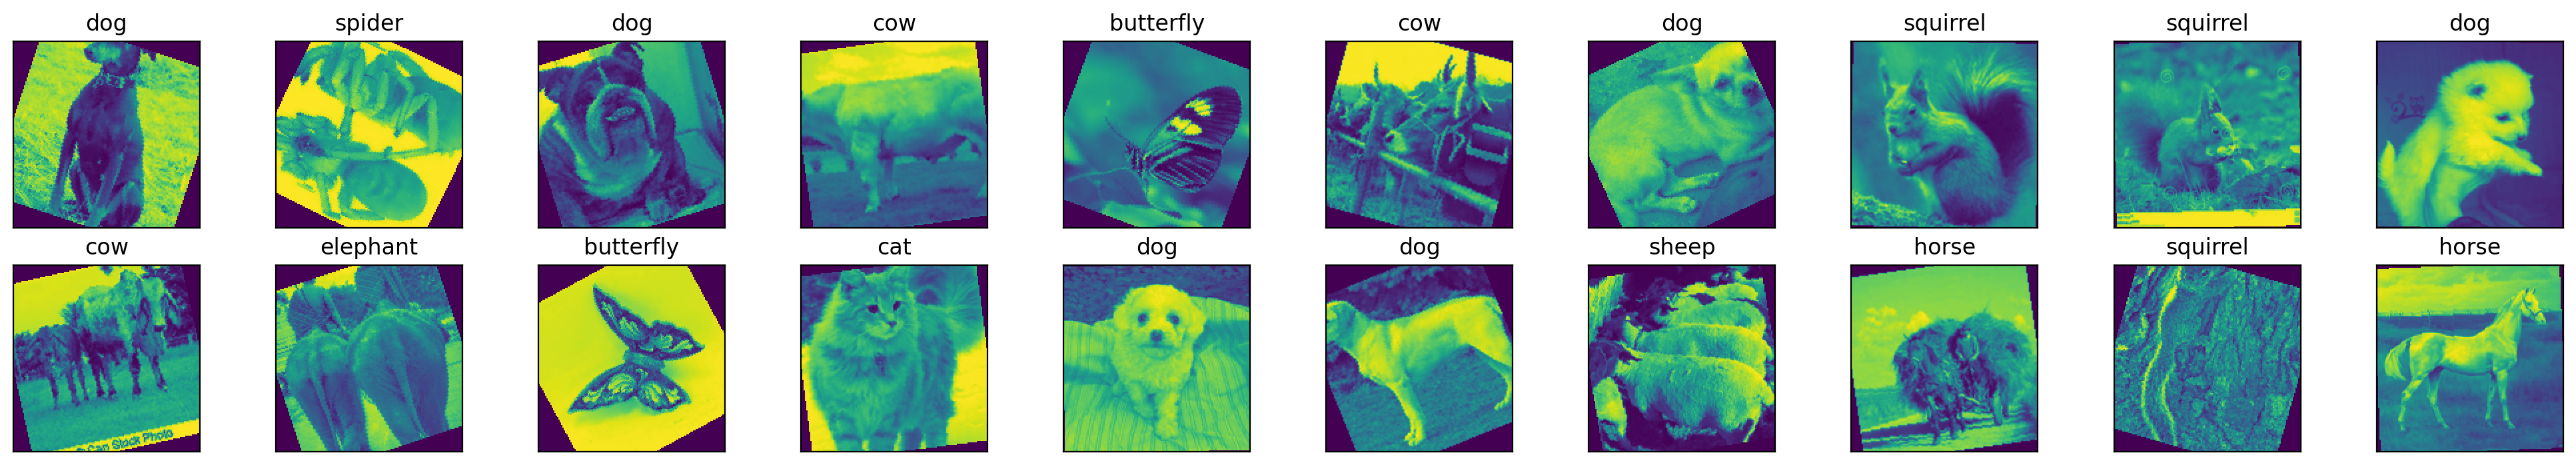

In [23]:
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

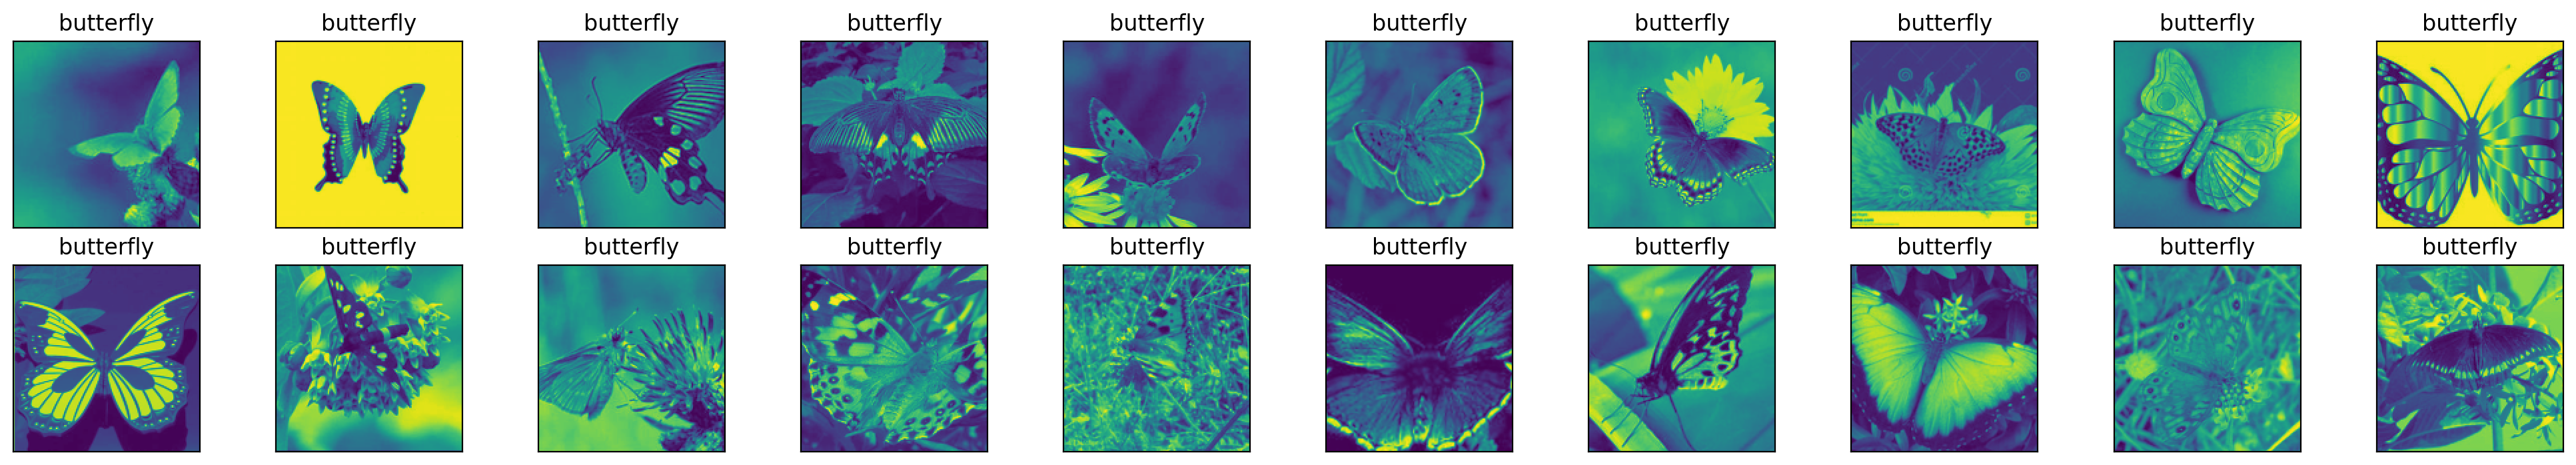

In [24]:
images, labels = next(iter(test_loader))
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

So here I just plotted some images with their labels to have an idea of how the dataset looks like.

### Building the Classifier

In [29]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding = 1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        self.conv3 = nn.Conv2d(32, 48, 3, padding =1)
        self.conv4 = nn.Conv2d(48, 64, 3, padding =1)
        self.conv5 = nn.Conv2d(64, 80, 3, padding =1)
        
        
        self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(4*4*80, 980)
        self.fc2 = nn.Linear(980, 123)
        self.fc3 = nn.Linear(123, 10)
        
        self.dropout = nn.Dropout(p= 0.25)
        self.batchn1 = nn.BatchNorm2d(16)
        self.batchn2 = nn.BatchNorm2d(32)
        self.batchn3 = nn.BatchNorm2d(48)
        self.batchn4 = nn.BatchNorm2d(64)
        self.batchn5 = nn.BatchNorm2d(80)
        
    def forward(self, x):
        
        x = self.pool(F.relu(self.batchn1(self.conv1(x))))
        x = self.pool(F.relu(self.batchn2(self.conv2(x))))
        x = self.pool(F.relu(self.batchn3(self.conv3(x))))
        x = self.pool(F.relu(self.batchn4(self.conv4(x))))
        x = self.pool(F.relu(self.batchn5(self.conv5(x))))
        x = torch.flatten(x, 1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.log_softmax(self.fc3(x), dim=1)
        
        return x

So I used a CNN with 5 convolutional layers, each layer contains 16 more activation maps (or filters) then the previous one; The filter size that I used is 3*3 for all the layers with a padding of 1 in order to keep the size of the original image during convolution. I used a pooling layers after every convolutional layer in order to reduce the size of the activation maps, I used 2 by 2 Max pooling with a stride of 2. Then I flattened the output of the conv part to feed it to fully connected linear layers (3 in this project) with an input layer of the 80*4*4 (80 is the number of channels of the previous layer, and 4*4 is the size of the images after all the pooling layers)  and an output layers with 10 neurons corresponding to the 10 catergaries. I also used dropout with the probability of .25 and batch normalization to avoid overfitting.

In [30]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr= 0.0005)

I chose the negative log likelihod loss as my loss function and stochastic gradient descent as an optimizer with a learning rate of 0.0005 (I tried with such a small lr in order for the model to converge slowly)

###  Training the model

In [31]:
epochs = 500

valid_loss_min = np.Inf

for epoch in range(epochs):
    
    train_loss = 0.0
    valid_loss = 0.0
    
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        train_loss += loss.item()*images.size(0)
        loss.backward()
        optimizer.step()
        
    model.eval()
    for images, labels in valid_loader:
        logits = model(images)
        loss = criterion(logits, labels)
        valid_loss += loss.item()*images.size(0)
        
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print("Epoch ", epoch+1, "train loss ", train_loss, "validation loss ", valid_loss)
    
    if valid_loss <= valid_loss_min:
        print("validation loss decreased", valid_loss_min, "---->", valid_loss)
        print("Saving the model")
        torch.save(model.state_dict(), "model_cnn.pt")
        valid_loss_min = valid_loss

Epoch  1 train loss  2.2296946931520973 validation loss  2.187926614917995
validation loss decreased inf ----> 2.187926614917995
Saving the model
Epoch  2 train loss  2.166708405916989 validation loss  2.1402766617024
validation loss decreased 2.187926614917995 ----> 2.1402766617024
Saving the model
Epoch  3 train loss  2.1212186656051664 validation loss  2.086167561489603
validation loss decreased 2.1402766617024 ----> 2.086167561489603
Saving the model
Epoch  4 train loss  2.0729924969870304 validation loss  2.0317531454390374
validation loss decreased 2.086167561489603 ----> 2.0317531454390374
Saving the model
Epoch  5 train loss  2.0296504801539403 validation loss  1.9909236072918066
validation loss decreased 2.0317531454390374 ----> 1.9909236072918066
Saving the model
Epoch  6 train loss  1.9850234756882446 validation loss  1.9396405909948302
validation loss decreased 1.9909236072918066 ----> 1.9396405909948302
Saving the model
Epoch  7 train loss  1.9437623391564147 validation lo

Epoch  70 train loss  1.0180109514289146 validation loss  1.0222180709746724
validation loss decreased 1.0283643910274414 ----> 1.0222180709746724
Saving the model
Epoch  71 train loss  1.0172042708147253 validation loss  1.026221659909124
Epoch  72 train loss  1.0072348673052085 validation loss  0.9927176174910172
validation loss decreased 1.0222180709746724 ----> 0.9927176174910172
Saving the model
Epoch  73 train loss  1.003210903924114 validation loss  1.013791246575434
Epoch  74 train loss  1.0059585308445937 validation loss  0.985886079620048
validation loss decreased 0.9927176174910172 ----> 0.985886079620048
Saving the model
Epoch  75 train loss  0.994066238633632 validation loss  1.0661123075922907
Epoch  76 train loss  0.9846467724504666 validation loss  1.020372284092189
Epoch  77 train loss  0.9820473425009704 validation loss  0.972274288923844
validation loss decreased 0.985886079620048 ----> 0.972274288923844
Saving the model
Epoch  78 train loss  0.980361827777287 valida

Epoch  152 train loss  0.7248482996082564 validation loss  0.8606676014725136
Epoch  153 train loss  0.7231093943061471 validation loss  0.7605581276658653
validation loss decreased 0.7864031263595618 ----> 0.7605581276658653
Saving the model
Epoch  154 train loss  0.7157210248711028 validation loss  0.7928628327190013
Epoch  155 train loss  0.7187834553581762 validation loss  0.7621987631355507
Epoch  156 train loss  0.7112632925684061 validation loss  0.7984282850643287
Epoch  157 train loss  0.7103973428720185 validation loss  0.7577639757435103
validation loss decreased 0.7605581276658653 ----> 0.7577639757435103
Saving the model
Epoch  158 train loss  0.7089161724917349 validation loss  0.8063211814216945
Epoch  159 train loss  0.7099093866881439 validation loss  0.7982932863604043
Epoch  160 train loss  0.7014555128570502 validation loss  0.7860593268404836
Epoch  161 train loss  0.7026977949333845 validation loss  0.8005363820687584
Epoch  162 train loss  0.6961815838041316 vali

Epoch  245 train loss  0.5464860881294428 validation loss  0.7009138596230658
Epoch  246 train loss  0.5391482677903757 validation loss  0.7072963501520203
Epoch  247 train loss  0.5461239442531555 validation loss  0.7505017282306284
Epoch  248 train loss  0.5368547605471528 validation loss  0.9120997455384996
Epoch  249 train loss  0.5383858007984884 validation loss  0.722061014679319
Epoch  250 train loss  0.5421645739957851 validation loss  0.7274461733834179
Epoch  251 train loss  0.5348108513280749 validation loss  1.1912287723614974
Epoch  252 train loss  0.5397092712340643 validation loss  0.6545124313681598
validation loss decreased 0.6596754880343082 ----> 0.6545124313681598
Saving the model
Epoch  253 train loss  0.5277874964480814 validation loss  0.6673385632498828
Epoch  254 train loss  0.5295348595597507 validation loss  0.7005697088828985
Epoch  255 train loss  0.5299787165717995 validation loss  0.7181781406563837
Epoch  256 train loss  0.521230804007011 validation loss

Epoch  343 train loss  0.4172503504509155 validation loss  0.6627585398690136
Epoch  344 train loss  0.4194386645567127 validation loss  0.6175369222382993
validation loss decreased 0.619906109125142 ----> 0.6175369222382993
Saving the model
Epoch  345 train loss  0.40981187833648697 validation loss  0.6642783463289197
Epoch  346 train loss  0.4207327999843938 validation loss  0.6989941124178937
Epoch  347 train loss  0.41241299204918425 validation loss  0.6387745263495883
Epoch  348 train loss  0.41380234041367836 validation loss  0.6843225422688728
Epoch  349 train loss  0.41849589336611664 validation loss  0.7077490101689877
Epoch  350 train loss  0.41378350028986977 validation loss  0.6701447089081225
Epoch  351 train loss  0.4131640150129703 validation loss  0.6803969313269076
Epoch  352 train loss  0.40464960464810407 validation loss  0.6431823873289542
Epoch  353 train loss  0.4040968043253206 validation loss  0.6636668557130196
Epoch  354 train loss  0.4103622333387019 validati

Epoch  440 train loss  0.3271996848486001 validation loss  0.6714045579306746
Epoch  441 train loss  0.3321237436361133 validation loss  0.6362700579534982
Epoch  442 train loss  0.3429904372950978 validation loss  0.6058907552761732
Epoch  443 train loss  0.3293380551943426 validation loss  0.7563014901202658
Epoch  444 train loss  0.3292869920061449 validation loss  0.638371552620533
Epoch  445 train loss  0.3291100241557639 validation loss  0.6608806019819877
Epoch  446 train loss  0.32505399120721096 validation loss  0.6219368398621462
Epoch  447 train loss  0.32462535696816697 validation loss  0.6218391475182224
Epoch  448 train loss  0.3295180476177052 validation loss  0.6321767641150433
Epoch  449 train loss  0.3279783154040333 validation loss  0.7091929671269108
Epoch  450 train loss  0.3214541355772678 validation loss  0.698059421317013
Epoch  451 train loss  0.326269081505836 validation loss  0.6469293897854533
Epoch  452 train loss  0.32252073579236085 validation loss  0.676

 The training was over 500 epochs, the loss on the evaluation set went from 2.18 to .58 (which is great). I wrote the code for the model to be saved automatically whenever the validation loss decreases that way I get the model with the best weights and least error.

In [32]:
model.load_state_dict(torch.load("model_cnn.pt"))

<All keys matched successfully>

### Testing the model

In [33]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)    
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) 
    for i in range(len(target)):

        label = target.data[i]
    
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.664271

Test Accuracy of butterfly: 86% (26/30)
Test Accuracy of   cat: 63% (19/30)
Test Accuracy of   cow: 70% (21/30)
Test Accuracy of   dog: 90% (27/30)
Test Accuracy of elephant: 90% (27/30)
Test Accuracy of   hen: 93% (28/30)
Test Accuracy of horse: 76% (23/30)
Test Accuracy of sheep: 76% (23/30)
Test Accuracy of spider: 90% (27/30)
Test Accuracy of squirrel: 60% (18/30)

Test Accuracy (Overall): 79% (239/300)


After importing the model with the least validation loss, I testes it on my test set and got an overall accuracy of 79% which is near to what I excpected. Above we can see the accuracy per class (the highest accuracy is that of "hen" with 93% and the lowest accuracy is 60% for the class "squirrel"). I guess that the difference in accuracy between classes can be explained by the higher number of samples in the files of classes with higher accuracy, meaning that the model learned the classes that has more instances better.

In [34]:
def imshow(img):
    img = img / 2 + 0.5  
    plt.imshow(np.transpose(img, (1, 2, 0)))  

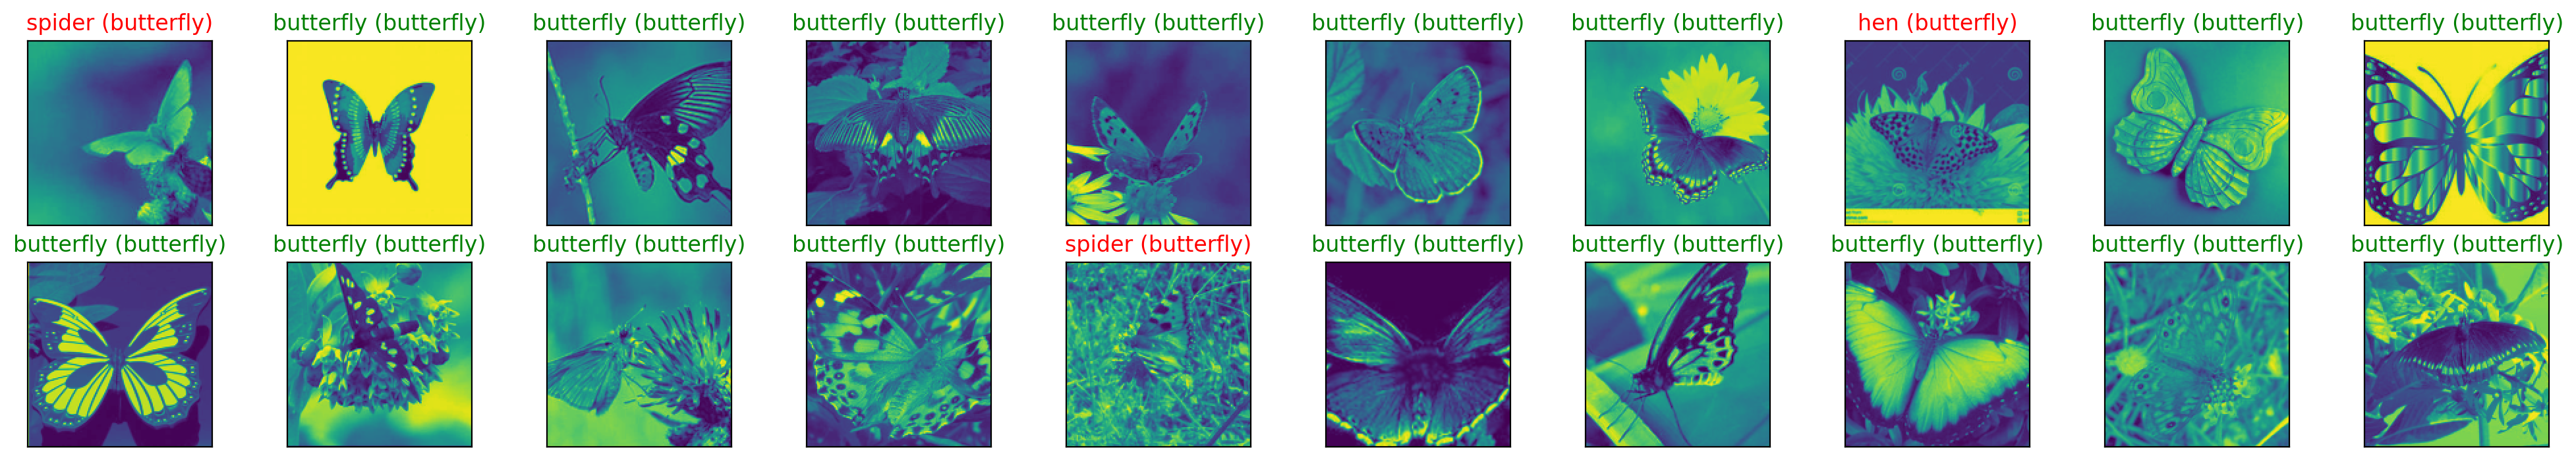

In [35]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
images.numpy()

output = model(images)
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) 

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

Finally, I plotted an example from the test set (the butyterfly) with the correct label in brackets next to the predicted labels.

## Conclusion

In this notebook I tried to classify images of 10 animals using a convolutional neural network. I started by processing the images using torchvision transforms, I then created a multilayer model with 5 convolutional layers and 3 linear layers, with maxpooling after every convolution. The training phase took some time (especially that I'm working on a cpu), I chose the number of epochs to be 500 after a couple of trials with different numbers, but it yielded great results (.66 test error with 79% test accuracy). I can safely say that I am satified with the results of my model.